<a href="https://colab.research.google.com/github/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/notebooks/AAPL.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>


Apple社の財務データを用いて, 企業価値及び超過価値の計算をする.

さらに,セグメント売上高別にその事業をメインとして経営する企業と比較した仮想的な価値も導出する.


### Apple社のセグメントデータ
[AAPL_category.csv](https://github.com/takumi-saka-mo/DEVIRSIFY_Analysis/blob/main/data/AAPL_category.csv)

### 参照
https://www.apple.com/jp/newsroom/2024/10/apple-reports-fourth-quarter-results/

Apple社(証券コード : AAPL) ではiOSを搭載したモバイル端末(iPhone、iPad)などのデバイス販売をし, iCloudやApple Musicといったサブスクリプションサービスも提供されてる.







In [1]:
# srcディレクトリから calculate_EXVAL.py をimport
import sys, os, math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


sys.path.append(os.path.abspath("../src"))
from calculate_EXVAL import DiversifyApproach

Appleのセグメント別売上高を下記のの2つに分類

- デバイス領域
- サービス領域


In [2]:
import pandas as pd


url = "https://raw.githubusercontent.com/takumi-saka-mo/DEVIRSIFY_Analysis/main/data/AAPL_category.csv"
data = pd.read_csv(url, encoding = "UTF-8").set_index("Category")


data["Devices"] = data["iPhone"] + data["Mac"] + data["iPad"] + data["Wearables, Home and Accessories"]
data = data.drop(columns = ["iPhone", "Mac","iPad","Wearables, Home and Accessories"])
data


,Services,Devices
Category,,
Sales,96169,294866


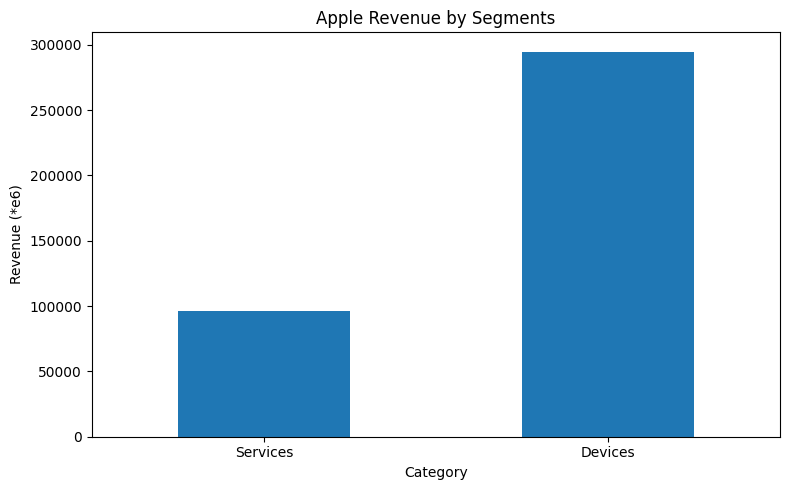

In [3]:
data.T.plot(kind = "bar", figsize = (8, 5), legend = False)
plt.title("Apple Revenue by Segments")
plt.ylabel("Revenue (*e6)")
plt.xlabel("Category")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
# セグメント値の設定
seg1_value = data["Services"].iloc[0] * 1e6 # 単位 : 百万円
seg2_value = data["Devices"].iloc[0] * 1e6
seg_list = [seg1_value, seg2_value]

# 専業企業リスト
services_companies = ["NFLX", "DBX", "SPOT"]
devices_companies = ["HPQ", "DELL", "LNVGY"]
specialized_tickers = [services_companies, devices_companies]

# DiversifyApproach
div_approach = DiversifyApproach(
    ticker = "AAPL", # Apple
    specialized_tickers = specialized_tickers,
    data = data
)

# Appleの企業価値の計算
value = div_approach.calculate_value()
print(f"企業価値: {value}")

# EXVAL（超過価値）の計算
exval = div_approach.calculate_exval(seg_list)
print(f"超過価値 (EXVAL): {exval}")

企業価値: 3789064596288.0
超過価値 (EXVAL): 1.4028402823477382
